## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
boston = pd.read_csv(url)
X = boston.drop(columns=['medv']).copy()
y = boston[['medv']]

In [3]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [4]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
arvore = DecisionTreeRegressor(max_depth=2)

arvore.fit(X_train, y_train)
predict = arvore.predict(X_train)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [6]:
path = arvore.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [7]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

clfs

[DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(ccp_alpha=5.649717514119156e-05, random_state=0),
 DecisionTreeRegressor(ccp_alpha=5.6497175141271845e-05, random_state=0),
 DecisionTreeRegressor(ccp_alpha=6.355932203785487e-05, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0002259887005647662, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.00035310734463276836, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0004613935969835074, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0006779661016952621, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0006920903954802389, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0006920903954802389, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0007627118644031956, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0014124293785310734, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0014124293785311537, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0017090395480226504, random_state=0),
 Decision

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [10]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]
print(train_scores)
print(test_scores)

[0.0, 0.0009792843691148775, 0.0010922787193973632, 0.001325329566854987, 0.004503295668549899, 0.008691148775894535, 0.010168549905838037, 0.016241996233521662, 0.019690677966101702, 0.019690677966101702, 0.02265834902699311, 0.051728813559322046, 0.051728813559322046, 0.06283992467043316, 0.07092231638418084, 0.07965170775552136, 0.0899982797334493, 0.09870826090105757, 0.11059714978994646, 0.11682596334926851, 0.13884377565309777, 0.1648842652952823, 0.18353162876044238, 0.19885648751750448, 0.23464807571587235, 0.27420960003587125, 0.27420960003587125, 0.296998363375482, 0.296998363375482, 0.3128316967088154, 0.3128316967088154, 0.328995134965474, 0.3821242377365258, 0.40118261815083855, 0.41082480270827726, 0.45202698188503276, 0.45202698188503276, 0.46473904806743793, 0.46473904806743793, 0.5489904976660106, 0.5634992861154771, 0.5788806420476804, 0.7185651994864751, 0.8282934301384347, 0.8755815657316551, 0.8994081283717771, 0.9477878700989764, 0.974237964260935, 0.9742379642609

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

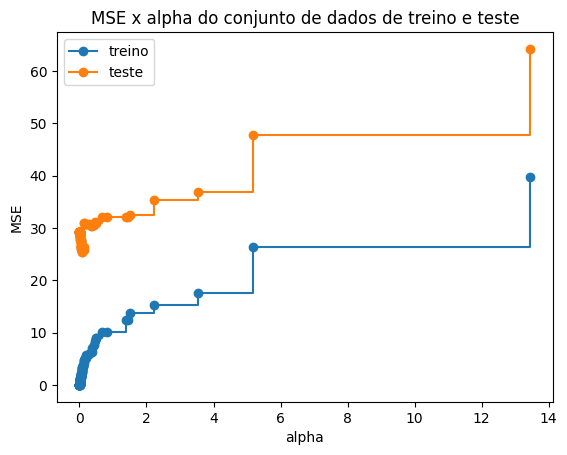

DecisionTreeRegressor(random_state=0)

In [11]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()


arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=.00)
arvore_final.fit(X_train,y_train)

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [12]:
print(f"R-quadrado an base de testes: {arvore_final.score(X_test,y_test):.2f}")

R-quadrado an base de testes: 0.71


### 7. Visualize esta árvore.

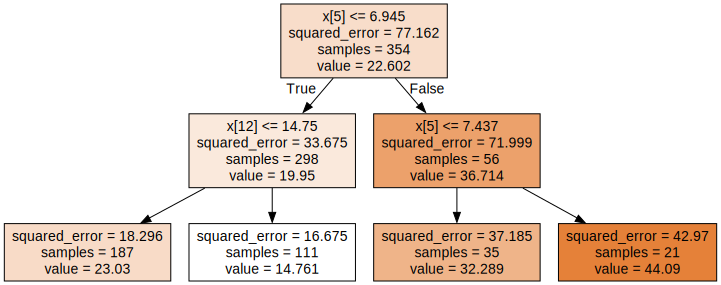

In [13]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(arvore, out_file=None, 
                                feature_names=X.columns.name,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph